##"다음 분기에 어떤 게임을 설계해야 할까?"

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.StringIO(uploaded['vgames2.csv'].decode('utf8')))
data.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
##데이터 전처리
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum() ##결측치 확인

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
data = data.dropna(axis = 0) ##데이터 프레임 크기에 비해 결측값 적어 제거

In [ ]:
data.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
##데이터 적은 year 삭제
data = data.drop(data[data['Year'] == 2017].index)
data = data.drop(data[data['Year'] == 2020].index)

In [ ]:
##year값 고치기
import numpy as np
data['Year'] = data['Year'].apply(np.int64)
data['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 1980,
          2,   13,    0,   12,   94])

In [ ]:
data.loc[data['Year'] <= 22, 'Year'] += 2000
data.loc[data['Year'] < 100, 'Year'] += 1900
data['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 1980])

In [ ]:
#M으로 통일
def toM(string):
  if "M" in string:
    result = string.replace("M","")
  elif "K" in string:
    string1 = string.replace("K","")
    result = float(string1) / 1000
  else:
    result = float(string)
  return float(result)

In [ ]:
data['NA_Sales'] = data['NA_Sales'].apply(toM)
data['EU_Sales'] = data['EU_Sales'].apply(toM)
data['JP_Sales'] = data['JP_Sales'].apply(toM)
data['Other_Sales'] = data['Other_Sales'].apply(toM)

In [ ]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [ ]:
data['Total_Sales'] = data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales'] + data['Other_Sales']

In [ ]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


##지역별 장르 선호도 형태 차이

In [ ]:
allsales_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
allsales_genre = allsales_genre.groupby(['Genre']).sum()
allsales_genre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.59,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45


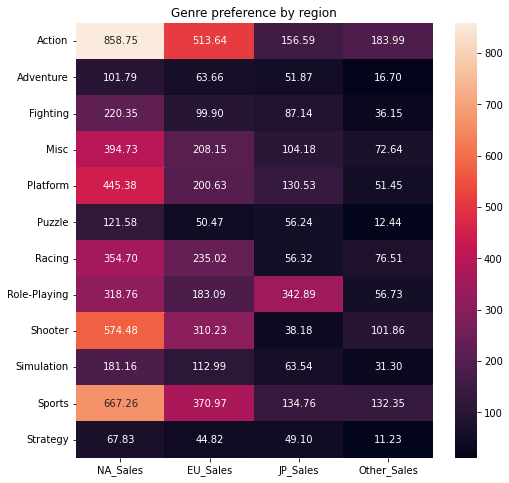

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sequential_colors = sns.color_palette("RdPu", 10)

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.pcolor(sequential_colors)
sns.heatmap(allsales_genre, annot = True, fmt = ".2f")
plt.title("Genre preference by region")
plt.ylabel('')
plt.show()


* 일본 외 지역 다양하게 선호한다는 점 비슷
* 일본 눈에 띄게 Role-Playing 선호

##각 지역별 선호도

In [ ]:
nasales_genre = data[['Genre','NA_Sales']]
eusales_genre = data[['Genre','EU_Sales']]
jpsales_genre = data[['Genre','JP_Sales']]
othersales_genre = data[['Genre','Other_Sales']]

In [ ]:
nasales_genre = nasales_genre.groupby('Genre').sum()
eusales_genre = eusales_genre.groupby('Genre').sum()
jpsales_genre = jpsales_genre.groupby('Genre').sum()
othersales_genre = othersales_genre.groupby('Genre').sum()

In [ ]:
nasales_genre.head()

,NA_Sales
Genre,
Action,858.75
Adventure,101.79
Fighting,220.35
Misc,394.73
Platform,445.38


#북미 장르 선호도

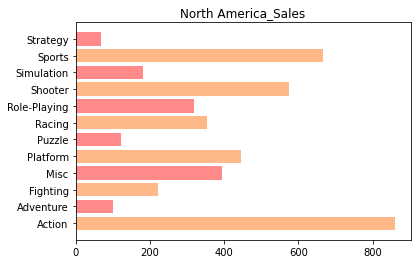

In [ ]:
import matplotlib.pyplot as plt

plt.barh(nasales_genre.index, nasales_genre.NA_Sales, color = ["#FFB887", "#FF8A89"])
plt.title("North America_Sales")
plt.show()

* action, sports, shooter 순

In [ ]:
eusales_genre.head()

,EU_Sales
Genre,
Action,513.64
Adventure,63.66
Fighting,99.90
Misc,208.15
Platform,200.63


#유럽 장르 선호도

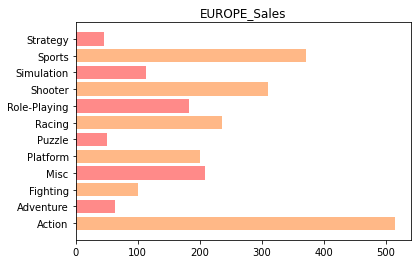

In [ ]:
plt.barh(eusales_genre.index, eusales_genre.EU_Sales, color = ["#FFB887", "#FF8A89"])
plt.title("EUROPE_Sales")
plt.show()

* action, sports, shooter 순

In [ ]:
jpsales_genre.head()

,JP_Sales
Genre,
Action,156.59
Adventure,51.87
Fighting,87.14
Misc,104.18
Platform,130.53


#일본 장르 선호도

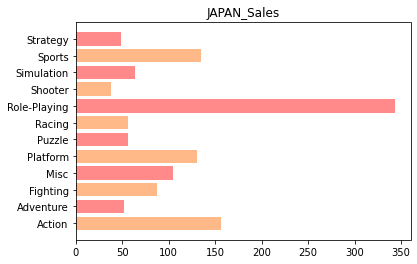

In [ ]:
plt.barh(jpsales_genre.index, jpsales_genre.JP_Sales, color = ["#FFB887", "#FF8A89"])
plt.title("JAPAN_Sales")
plt.show()

* role-playing, action, sports 순
* action, sports도 선호
* 전반적으로 액션 장르를 선호 

In [ ]:
othersales_genre.head()

,Other_Sales
Genre,
Action,183.99
Adventure,16.70
Fighting,36.15
Misc,72.64
Platform,51.45


#그 외 지역 장르 선호도

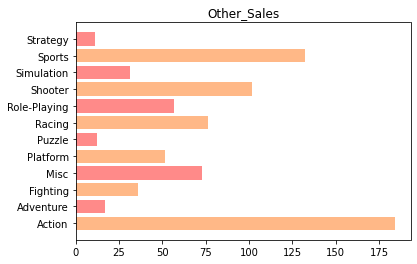

In [ ]:
plt.barh(othersales_genre.index, othersales_genre.Other_Sales, color = ["#FFB887", "#FF8A89"])
plt.title("Other_Sales")
plt.show()

* action, sports, shooter 순

##지역 출고량 비교

In [ ]:
allsales_genre = allsales_genre.unstack().to_frame().reset_index()
allsales_genre.rename(columns = {'level_0' : 'continent'}, inplace = True)
allsales_genre.rename(columns = {0 : 'total'}, inplace = True)
allsales_genre.head()

,continent,Genre,total
0,NA_Sales,Action,858.75
1,NA_Sales,Adventure,101.79
2,NA_Sales,Fighting,220.35
3,NA_Sales,Misc,394.73
4,NA_Sales,Platform,445.38


In [ ]:
allsales_continent = allsales_genre.drop('Genre', axis=1)
allsales_continent = allsales_continent.groupby(['continent'])['total'].sum().to_frame()
allsales_continent.head()

,total
continent,
EU_Sales,2393.57
JP_Sales,1271.34
NA_Sales,4306.77
Other_Sales,783.35


In [ ]:
sum = allsales_continent['total'].sum()
allsales_continent['sales_rate']= round((allsales_continent["total"] / sum) * 100, 2)
allsales_continent.head()

,total,sales_rate
continent,,
EU_Sales,2393.57,27.34
JP_Sales,1271.34,14.52
NA_Sales,4306.77,49.19
Other_Sales,783.35,8.95


Text(0.5, 1.0, 'regional game sales rate')

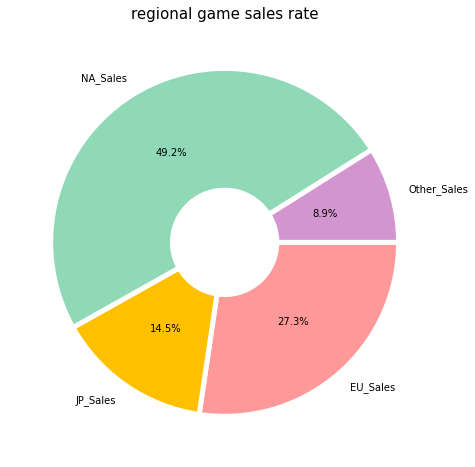

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
allsales_continent['sales_rate'].plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")
plt.title('regional game sales rate', fontsize = 15)

* 가장 많은 비율을 차지하는 북미가 출고량이 가장 높다
* 그 다음은 유럽
* (TARGET) 장르 선호도 형태도 비슷 => 출고량 높은 북미와 유럽시장

##연도별 게임 출고량에 따른 장르 트렌드(공급 - 각 연도마다 가장 많이 출시된 장르)

In [ ]:
year_max_sales = data.groupby(['Year', 'Genre']).size().reset_index(name='count') #년도별 장르 갯수
year_max_sales = year_max_sales[year_max_sales.groupby(['Year'])['count'].transform(max) == year_max_sales['count']].reset_index(drop=True) #가장 값이 큰 값만 뽑기
year_max_sales = year_max_sales.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True) # 중복값 제외
year_max_sales.head()

,Year,Genre,count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Shooter,3


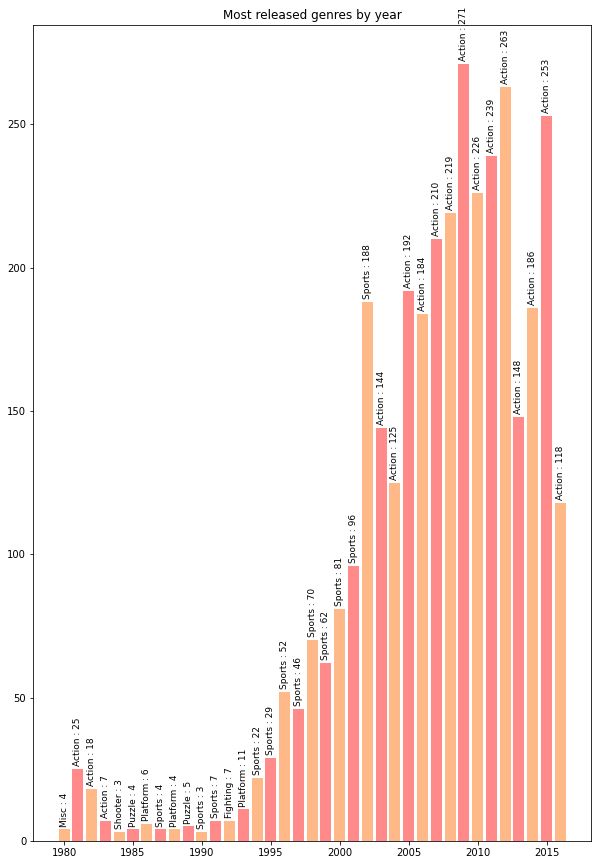

In [ ]:
plt.figure(figsize=(10,15))
plt.bar(year_max_sales.Year, year_max_sales['count'], color = ["#FFB887", "#FF8A89"])
plt.title("Most released genres by year")
for i, v in enumerate(year_max_sales['Year']):
    plt.text(v, year_max_sales['count'][i] + 1, str(year_max_sales['Genre'][i] + " : " + str(year_max_sales['count'][i])), fontsize = 9, color = 'black', rotation = 90, horizontalalignment = 'center', verticalalignment = 'bottom') 
plt.show()

* 공급 부분에서 최근 트렌드는 Action 장르

##연도별 최고 판매량 기록한 장르(수요 - 각 연도마다 가장 많이 팔린 장르)

In [ ]:
year_max_sales1 = data.groupby(['Year','Genre'])['Total_Sales'].sum().reset_index()
year_max_sales1 = year_max_sales1[year_max_sales1['Total_Sales'] == year_max_sales1.groupby(['Year'])['Total_Sales'].transform(max)]
year_max_sales1 = year_max_sales1.reset_index(drop=True)
year_max_sales1.head()

,Year,Genre,Total_Sales
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10


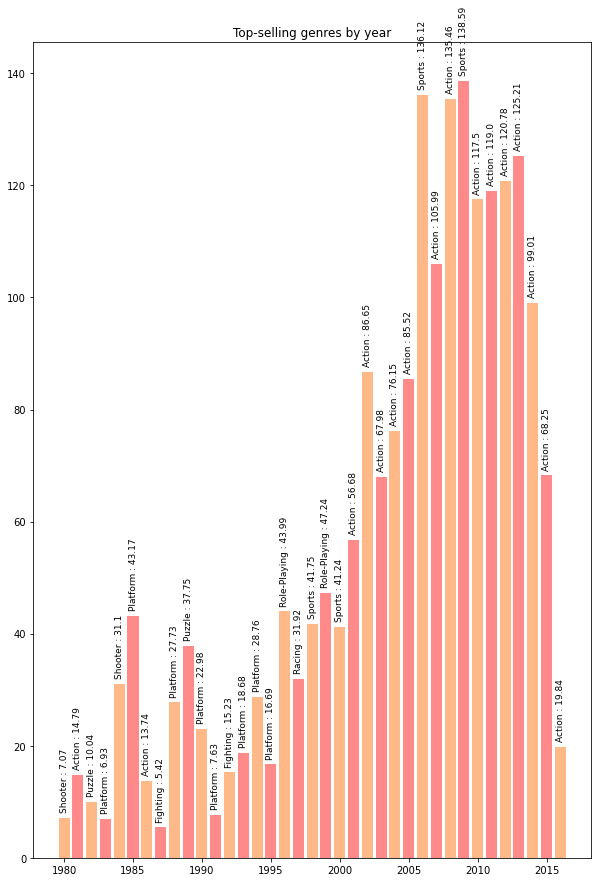

In [ ]:
plt.figure(figsize=(10,15))
plt.bar(year_max_sales1.Year, year_max_sales1.Total_Sales, color = ["#FFB887", "#FF8A89"])
plt.title("Top-selling genres by year")
for i in range(len(year_max_sales1['Year'])):
  plt.text(year_max_sales1.Year[i], year_max_sales1.Total_Sales[i] + 1,str(year_max_sales1.Genre[i] + " : " + str(round(year_max_sales1.Total_Sales[i], 2))), fontsize = 9, color = 'black', rotation = 90, horizontalalignment = 'center', verticalalignment = 'bottom') 
plt.show()

* 수요 부분에서 최근 트렌드는 Action 장르
* 수요와 공급의 측면에서 연도별 장르의 트렌드가 변화한다는 것을 알 수 있다.

#시대별 게임 트렌드 변화

In [ ]:
period_sales = data.groupby(['Year', 'Genre'])['Genre'].count().unstack().fillna(0)
period_sales.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1981,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0
1982,18.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2.0,0.0
1983,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1984,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0


In [ ]:
period_sales.loc['1980-1989', :] = period_sales.loc[[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]].sum()
period_sales.loc['1990-1999', :] = period_sales.loc[[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]].sum()
period_sales.loc['2000-2009', :] = period_sales.loc[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]].sum()
period_sales.loc['2010-2016', :] = period_sales.loc[[2010, 2011, 2012, 2013, 2014, 2015, 2016]].sum()

In [ ]:
 period_sales = period_sales.loc[['1980-1989', '1990-1999', '2000-2009', '2010-2016']]
 period_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980-1989,66.0,2.0,4.0,8.0,33.0,19.0,8.0,9.0,30.0,3.0,22.0,0.0
1990-1999,161.0,97.0,193.0,115.0,125.0,71.0,181.0,171.0,137.0,86.0,304.0,123.0
2000-2009,1579.0,631.0,442.0,997.0,565.0,361.0,797.0,729.0,718.0,551.0,1404.0,379.0
2010-2016,1433.0,538.0,196.0,561.0,150.0,115.0,233.0,554.0,395.0,205.0,569.0,167.0


In [ ]:
period_sales_genre = period_sales.unstack().reset_index()
period_sales_genre.columns = ['Genre', 'Year', 'Total']
period_sales_genre.head()

,Genre,Year,Total
0,Action,1980-1989,66.0
1,Action,1990-1999,161.0
2,Action,2000-2009,1579.0
3,Action,2010-2016,1433.0
4,Adventure,1980-1989,2.0


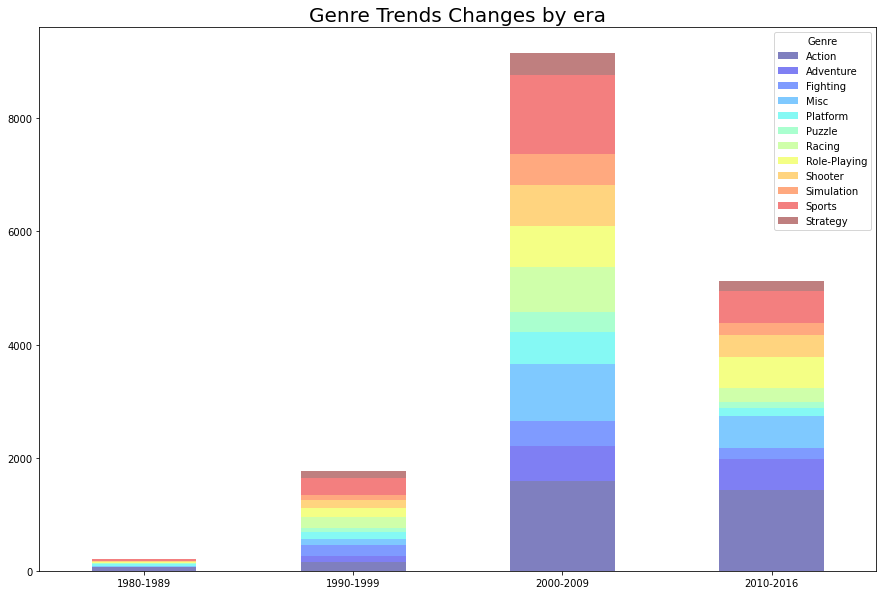

In [ ]:
period_sales.plot(kind = 'bar', stacked = True, figsize = (15, 10), cmap = 'jet', alpha=0.5 )
plt.title('Genre Trends Changes by era', fontsize = 20)
plt.xticks(rotation = 0)
plt.xlabel("")
plt.show()

* 액션, 어드벤쳐, 롤플레잉, 스포츠, 기타 장르 인기
* 파이팅, 플랫폼, 레이싱,시뮬레이션, 전략게임 인기 하락
* (GENRE) 타겟의 주요 인기 장르이자 최근 트렌드, ACTION

##출고량이 높은 게임

In [ ]:
sales_top100 = data[data.Year > 2010].sort_values(by = 'Total_Sales' ,ascending = False)
sales_top100 = sales_top100.head(100).reset_index(drop=True)
sales_top100.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04


# 출고량이 높다면 시리즈물로 나오지 않을까?

#이름 빈도 수로 시리즈물 확인

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor, width = width, height = height,colormap = "autumn").generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

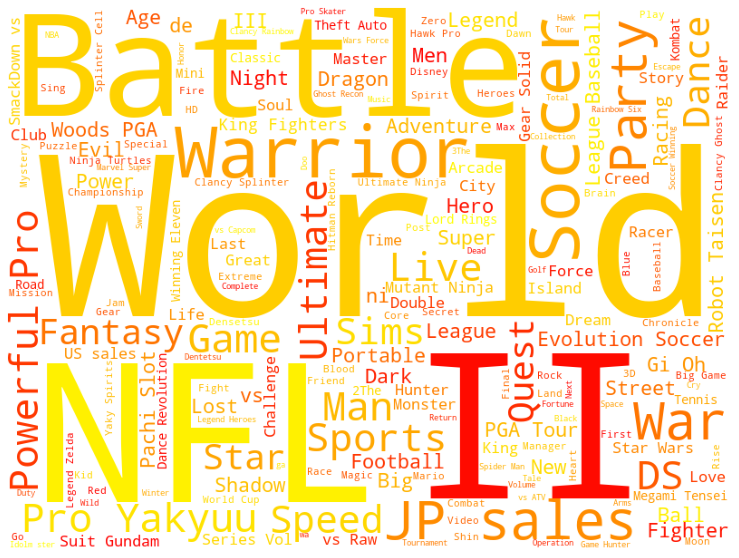

In [ ]:
displayWordCloud(''.join(data['Name']))

* world, 2, battle 시리즈물이 간행되고 있음을 확인.
* 대체적으로 FIFA, NFL 등 스포츠 쪽 게임이 시리즈물로 간행.
* 시리즈물로 이어지는 것 또한 인기를 이어갈 수 있는 하나의 방안으로 확인됨.

In [ ]:
def toM(string):
  if "World" in string:
    string

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales


#플랫폼별 매출량 top 100

In [ ]:
top100_platform = sales_top100.groupby(['Platform'])['Total_Sales'].sum().reset_index()
platform = top100_platform['Platform'].values
top100_platform.head()

,Platform,Total_Sales
0,3DS,85.78
1,DS,8.34
2,PC,9.08
3,PS3,155.97
4,PS4,132.01


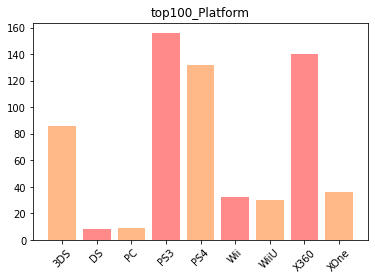

In [ ]:
plt.bar(top100_platform.Platform, top100_platform.Total_Sales, color = ["#FFB887", "#FF8A89"])
plt.xticks(rotation = 45)
plt.title("top100_Platform")
plt.show()

* 플랫폼은 PS시리즈와 X360이 인기 많다.

#장르별 매출량 top 100

In [ ]:
top100_genre = sales_top100.groupby(['Genre'])['Total_Sales'].sum().reset_index()
genre = top100_genre['Genre'].values
top100_genre.head()

,Genre,Total_Sales
0,Action,162.68
1,Fighting,12.46
2,Misc,47.36
3,Platform,33.48
4,Racing,27.47


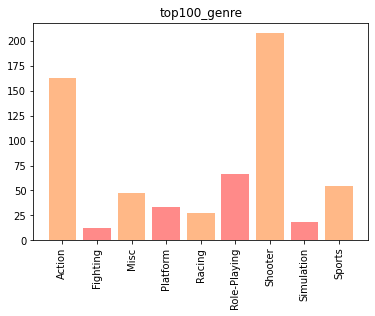

In [ ]:
plt.bar(top100_genre.Genre, top100_genre.Total_Sales, color = ["#FFB887", "#FF8A89"])
plt.xticks(rotation = 90)
plt.title("top100_genre")
plt.show()

* 전체적으로 ACTION이 인기가 많았지만 최근 10년 탑 100에서는 SHOOTER가 출시량이 가장 많다. 

In [ ]:
#회사별 매출량 top 100
top100_publisher = sales_top100.groupby(['Publisher'])['Total_Sales'].sum().reset_index()
genre = top100_publisher['Publisher'].values
top100_publisher.head()

,Publisher,Total_Sales
0,Activision,136.58
1,Bethesda Softworks,30.33
2,Capcom,3.44
3,Electronic Arts,96.58
4,Konami Digital Entertainment,3.38


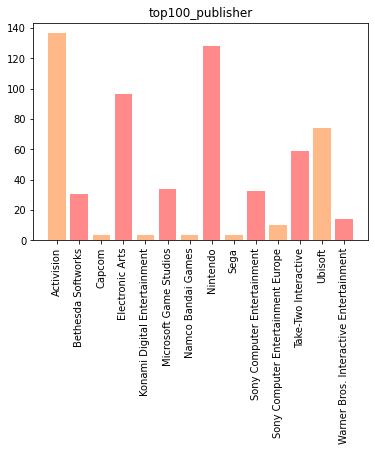

In [ ]:
plt.bar(top100_publisher.Publisher, top100_publisher.Total_Sales, color = ["#FFB887", "#FF8A89"])
plt.xticks(rotation = 90)
plt.title("top100_publisher")
plt.show()

##그렇다면 장르에 맞는 플랫폼이 따로 있을까? 장르와 플랫폼이 연관관계가 있을까? 

#플랫폼과 장르 간 연관관계 확인

h0 : 플랫폼과 장르 간 연관 관계가 없다.
h1 : 플랫폼과 장르 간 연관 관계가 있다.

In [ ]:
from scipy.stats import chi2_contingency

platform_genre = pd.crosstab(data.Genre, data.Platform)
platform_genre.head()

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,55,0,180,3,335,6,162,98,3,0,...,3,0,12,0,0,229,63,318,152,68
Adventure,1,1,36,11,237,5,35,20,2,0,...,26,0,4,1,0,83,3,47,26,11
Fighting,1,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,41,5,64,44,7
Misc,5,0,53,0,388,8,86,35,1,0,...,15,2,17,0,0,270,21,122,45,15
Platform,9,0,28,2,89,18,139,73,7,1,...,5,1,26,0,0,57,16,24,49,4


In [ ]:
chi2_contingency(platform_genre)[1]

0.0

* pvalue = 0 -> 귀무가설 기각, 대립가설 채택 => 플랫폼과 장르 간 연관관계가 있다.

#그렇다면 장르에 맞는 플랫폼은?

In [ ]:
genre_platform = data.groupby(['Genre', 'Platform'])['Total_Sales'].sum().reset_index()
genre_platform.head()

,Genre,Platform,Total_Sales
0,Action,2600,26.31
1,Action,3DS,56.49
2,Action,DC,1.26
3,Action,DS,113.99
4,Action,GB,7.93


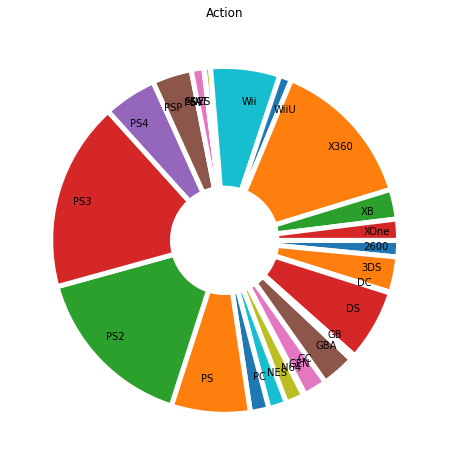

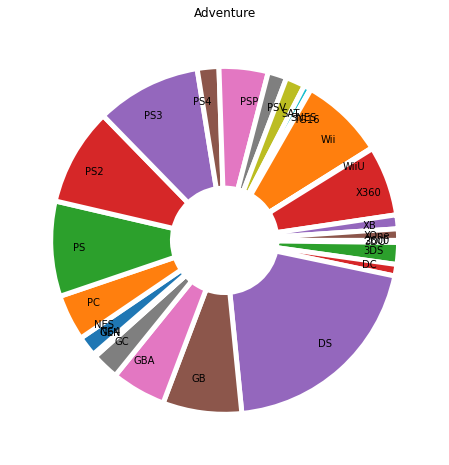

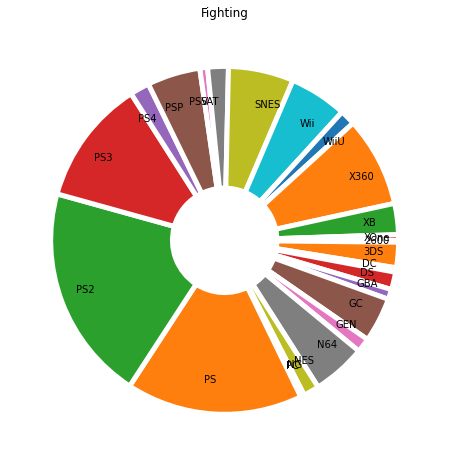

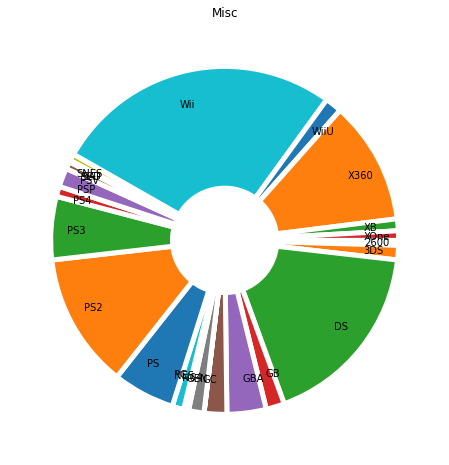

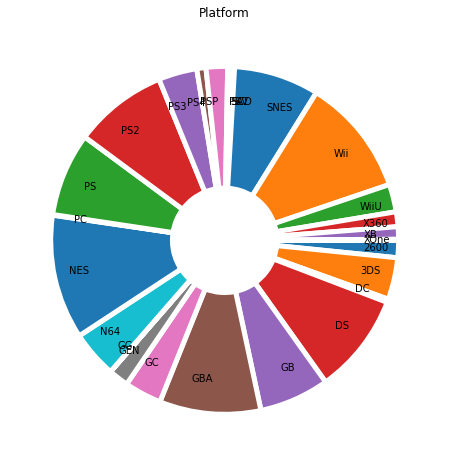

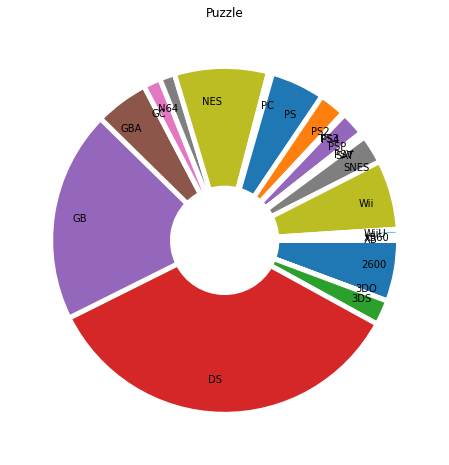

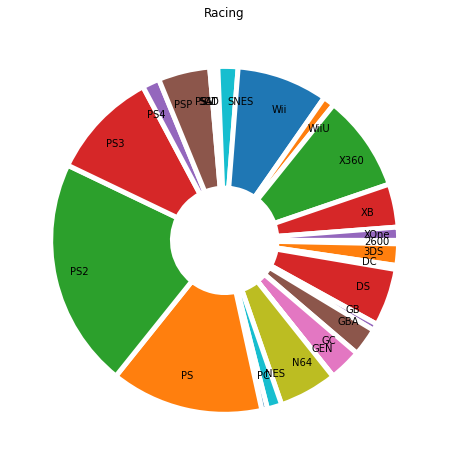

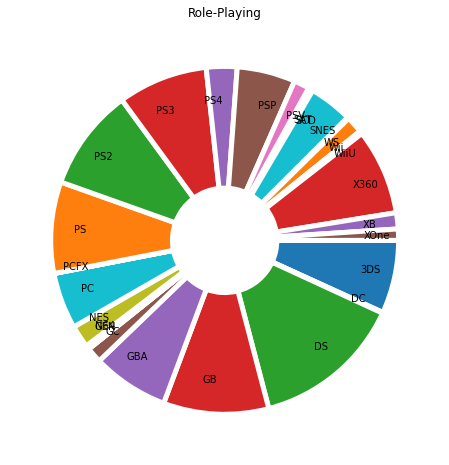

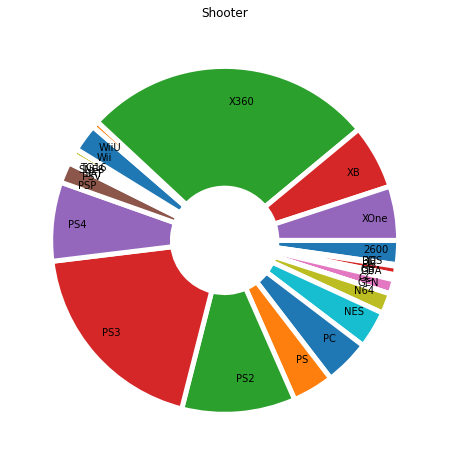

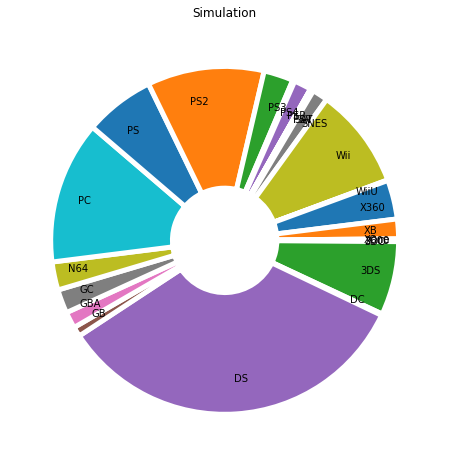

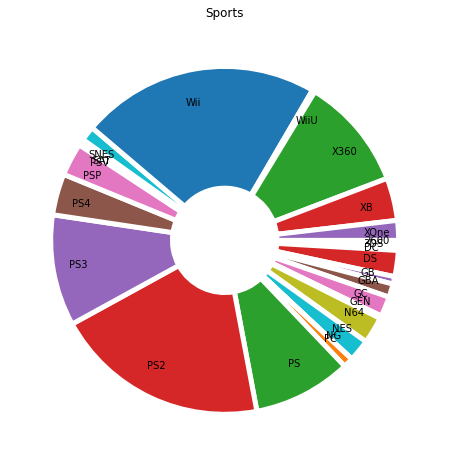

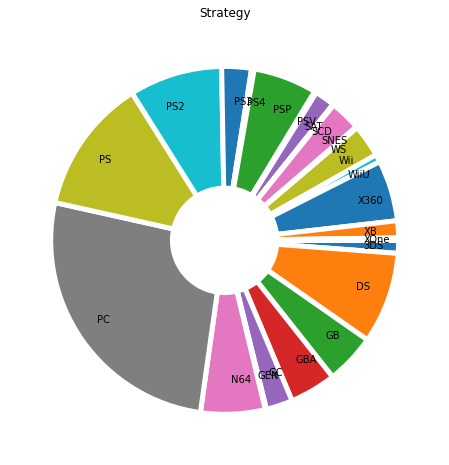

In [ ]:
genre = genre_platform['Genre'].unique()
wedgeprops = {'width': 0.7, 'edgecolor': 'white', 'linewidth': 5}
for i in range(len(genre)):
    genre_platform1 = genre_platform[genre_platform['Genre'] == genre[i]]
    plt.rcParams['figure.figsize'] = (8, 8)
    plt.pie(genre_platform1['Total_Sales'], counterclock = False, wedgeprops = wedgeprops, labels = genre_platform1.Platform, labeldistance = 0.8)
    plt.title(genre[i])
    plt.axis('off')
    plt.show()

* ACTION -> PS
* ADVENTURE -> DS
* FIGHTING -> PS
* MISC -> WII
* PLATFORM-> 다양
* PUZZLE -> DS,GB
* RACING -> PS
* ROLE-PLAYING -> 다양
* SHOOTHER -> X360
* SIMULATION -> DS
* SPORTS -> PS
* STRATEGY -> PC
* 장르에 따라 각기 다른 플랫폼이 인기가 있다.
* (PLATFORM) PS

## =>북미 유럽 시장을 대상으로 액션 장르를 추천합니다. 그에 맞는 PS 시리즈 플랫폼을 사용하는 것이 적절하며 주기적으로 시리즈물을 간행하는 것이 현재 게임 시장의 트렌드입니다.